In [1]:
import numpy as np
#import pandas as pd
#import random as rdm
#import fatiando as ft
import nielsen_codes as nc
import matplotlib.pyplot as plt

In [14]:
# Define o numero de pontos
npts = 500
# Define os vetores X, Y e Z
x = np.linspace(-5000,5000,npts)
y = np.copy(x)
#z = np.copy(x)
z = -0.5
# Realiza o mesh de pontos
X, Y = np.meshgrid(x/1000, y/1000)

In [25]:
# Descreve as informacoes para a esfera
# Esfera = X, Y, Z, Raio
#esfera = np.array([8., -4., 15., 2.])
esfera = np.array([-1500., 2000., 1000., 500.])
inc = 45.
dec = 45.
azim = 0.
mag = 5.

In [26]:
# Cria o vetor de dados
# Data para mapa de contorno
data1 = np.zeros([npts*npts, 3])
# Data para graficos de perfil
#data2 = np.zeros([npts, 3])

In [27]:
'''#Calcula as colunas 1, 2 e 3, referentes a Bx, By e Bz
k = 0
for j in range(y.size):
    for i in range(x.size):
        data1[k,0], data1[k,1], data1[k,2] = nc.dipole(X[i,j], Y[i,j], z, esfera[0], esfera[1], esfera[2], esfera[3], mag, inc, dec, azim)
# Salva o resultado
# Seu fela, o indice i faz varrer a variavel data1. O : atualiza tudo de uma so vez!
        k += 1
np.savetxt('data_files/result_induction_data1.txt', data1)'''

"#Calcula as colunas 1, 2 e 3, referentes a Bx, By e Bz\nk = 0\nfor j in range(y.size):\n    for i in range(x.size):\n        data1[k,0], data1[k,1], data1[k,2] = nc.dipole(X[i,j], Y[i,j], z, esfera[0], esfera[1], esfera[2], esfera[3], mag, inc, dec, azim)\n# Salva o resultado\n# Seu fela, o indice i faz varrer a variavel data1. O : atualiza tudo de uma so vez!\n        k += 1\nnp.savetxt('data_files/result_induction_data1.txt', data1)"

In [28]:
#Calcula as colunas 1, 2 e 3, referentes a Bx, By e Bz
k = 0
for j in range(y.size):
    for i in range(x.size):
        data1[k,0], data1[k,1], data1[k,2] = nc.dipole(x[i], y[j], z, esfera[0], esfera[1], esfera[2], esfera[3], mag, inc, dec, azim)
# Salva o resultado
# Seu fela, o indice i faz varrer a variavel data1. O : atualiza tudo de uma so vez!
        k += 1
np.savetxt('data_files/result_induction_data.txt', data1)

In [29]:
#Calcula as colunas 1, 2 e 3, referentes a Bx, By e Bz
#data2[:,0], data2[:,1], data2[:,2] = nc.dipole(x, y, z, esfera[0], esfera[1], esfera[2], esfera[3], mag, inc, dec, azim)
# Salva o resultado
#np.savetxt('data_files/result_induction_data2.txt', data2)

In [30]:
# Calculo do campo regional
# Valor da intensidade do campo (nT)
F = 24300.
incF = -30.
decF = 45.
azF = 0.
# Calcula as componentes do regional
regionalF = nc.regional_components(F, incF, decF, azF)

In [31]:
# Utilizando os arquivos DATA1
# Indica as componentes de B para x, y e z
Bx1 = data1[:,0]
By1 = data1[:,1]
Bz1 = data1[:,2]
# Utilizando os arquivos DATA2
# Indica as componentes de B para x, y e z - Caso 2
#x2 = data2[:,0]
#y2 = data2[:,1]
#z2 = data2[:,2]

In [32]:
# Computing the components + the regional:
BX1 = Bx1 + regionalF[0]
BY1 = By1 + regionalF[1]
BZ1 = Bz1 + regionalF[2]
# Calcula o valor resultante para DATA1
B1 = np.sqrt(((BX1**2)+(BY1**2)+(BZ1**2))) 
TF1 = B1 - F
# Salva o arquivo B1 e a anomalia
#np.savetxt('result_induction_data1.txt', B1)
np.savetxt('data_files/result_total_field_data1.txt', TF1)

# Computing the components + the regional:
#BX2 = Bx2 + regionalF[0]
#BY2 = By2 + regionalF[1]
#BZ2 = Bz2 + regionalF[2]
# Calcula o valor resultante para DATA2
#B2 = (np.sqrt((BX2**2)+(BY2**2)+(BZ2**2))) 
#TF2 = B2 - F
# Salva o arquivo B2 e a anomalia
#np.savetxt('result_induction_data2.txt', B2)
#np.savetxt('data_files/result_total_field_data2.txt', TF2)

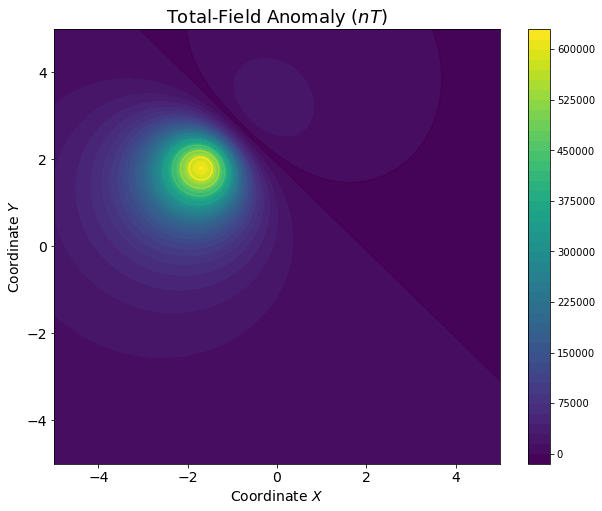

In [33]:
# Plota as componentes Bx, By e Bz, e a anomalia de campo total
'''
# Componente Bx
Bx1 = np.reshape(Bx1,(npts,npts))
plt.figure(figsize=(10,8))
plt.title('Componente $B_x$ (nT)', fontsize = 18)
totalfield = plt.contourf(X, Y, Bx1, 50)
plt.xlabel('Coordenada $X$', fontsize = 14)
plt.ylabel('Coordenada $Y$', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar()
#plt.savefig('figures/Bx_induction.png')
#plt.show()

# Componente By
By1 = np.reshape(By1,(npts,npts))
plt.figure(figsize=(10,8))
plt.title('Componente $B_y$ (nT)', fontsize = 18)
totalfield = plt.contourf(X, Y, By1, 50)
plt.xlabel('Coordenada $X$', fontsize = 14)
plt.ylabel('Coordenada $Y$', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar()
#plt.savefig('figures/By_induction.png')
#plt.show()

# Componente Bz
# Componente By
Bz1 = np.reshape(Bz1,(npts,npts))
plt.figure(figsize=(10,8))
plt.title('Componente $B_z$ (nT)', fontsize = 18)
totalfield = plt.contourf(X, Y, Bz1, 50)
plt.xlabel('Coordenada $X$', fontsize = 14)
plt.ylabel('Coordenada $Y$', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))
plt.colorbar()
#plt.savefig('figures/Bz_induction.png')
#plt.show()
'''
# Total Field
TF1 = np.reshape(TF1,(npts,npts))
plt.figure(figsize=(10,8))
plt.title('Total-Field Anomaly ($nT$)', fontsize = 18)
totalfield = plt.contour(X, Y, TF1)
totalfield = plt.contourf(X, Y, TF1, 50)
plt.xlabel('Coordinate $X$', fontsize = 14)
plt.ylabel('Coordinate $Y$', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(np.min(X), np.max(X))
#plt.ylim(np.min(Y), np.max(Y))
plt.colorbar()
#plt.savefig('figures/totalfield.png')
plt.show()

In [24]:
'''
# Plota as figuras para mapas de perfil das componentes X, Y e Z do campo magnetico induzido e o campo total
# Componente X
plt.figure(figsize=(10,6))
plt.plot(x, Bx2, 'k-')
plt.title('Componente $B_x$ de inducao', fontsize = 16)
plt.xlabel('Pontos de observacao', fontsize = 14)
plt.ylabel('$B_x$ (nT)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('figures/profile_bx.png')
#plt.show()
# Componente Y
plt.figure(figsize=(10,6))
plt.plot(x, By2, 'k-')
plt.title('Componente $B_y$ de inducao', fontsize = 16)
plt.xlabel('Pontos de observacao', fontsize = 14)
plt.ylabel('$B_y$ (nT)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('figures/profile_by.png')
#plt.show()
# Componente Z
plt.figure(figsize=(10,6))
plt.plot(x, Bz2, 'k-')
plt.title('Componente $B_z$ de inducao', fontsize = 16)
plt.xlabel('Pontos de observacao', fontsize = 14)
plt.ylabel('$B_z$ (nT)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('figures/profile_bz.png')
#plt.show()
# Componente Total
plt.figure(figsize=(10,6))
plt.plot(x, B2, 'k-')
plt.title('Componente Total $B$', fontsize = 16)
plt.xlabel('Pontos de observacao', fontsize = 14)
plt.ylabel('$B$ (nT)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('figures/profile_b_total.png')
#plt.show()
plt.figure(figsize=(10,6))
plt.plot(x, TF2, 'k-')
plt.title('Componente Total $B$', fontsize = 16)
plt.xlabel('Pontos de observacao', fontsize = 14)
plt.ylabel('$B$ (nT)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('figures/profile_totalfield.png')
#plt.show()
'''

"\n# Plota as figuras para mapas de perfil das componentes X, Y e Z do campo magnetico induzido e o campo total\n# Componente X\nplt.figure(figsize=(10,6))\nplt.plot(x, Bx2, 'k-')\nplt.title('Componente $B_x$ de inducao', fontsize = 16)\nplt.xlabel('Pontos de observacao', fontsize = 14)\nplt.ylabel('$B_x$ (nT)', fontsize = 14)\nplt.xticks(fontsize=14)\nplt.yticks(fontsize=14)\nplt.grid()\nplt.savefig('figures/profile_bx.png')\n#plt.show()\n# Componente Y\nplt.figure(figsize=(10,6))\nplt.plot(x, By2, 'k-')\nplt.title('Componente $B_y$ de inducao', fontsize = 16)\nplt.xlabel('Pontos de observacao', fontsize = 14)\nplt.ylabel('$B_y$ (nT)', fontsize = 14)\nplt.xticks(fontsize=14)\nplt.yticks(fontsize=14)\nplt.grid()\nplt.savefig('figures/profile_by.png')\n#plt.show()\n# Componente Z\nplt.figure(figsize=(10,6))\nplt.plot(x, Bz2, 'k-')\nplt.title('Componente $B_z$ de inducao', fontsize = 16)\nplt.xlabel('Pontos de observacao', fontsize = 14)\nplt.ylabel('$B_z$ (nT)', fontsize = 14)\nplt.xtic